In [50]:

import os
import matplotlib.pyplot as plt
import matplotlib.image as img 
import matplotlib.colors as mcol
import numpy as  np
from PIL import Image
import random

# Read & trim image

In [51]:
filename='o1_attr_sm_str'

#define model dimensions in m
y_mod=69000
z_mod=1700
seis=img.imread('Data\AttributeSections\%s.png' % filename)

seis_clean=seis[63:652,280:925,:] #Trimming white space on image

dims=seis_clean.shape

# RGB to int conversion

In [52]:
seis_int=seis_clean[:,:,0]
for j in range(0,dims[1]):
    for k in range(0,dims[0]):
        seis_int[k,j]=0.299*seis_clean[k,j,0]+0.587*seis_clean[k,j,1]+0.114*seis_clean[k,j,2]
                    

# QC

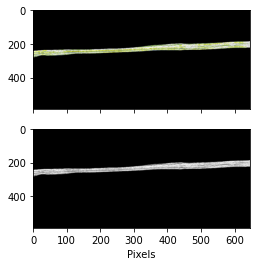

In [53]:

fig1,(ax1,ax3)=plt.subplots(2,sharex=True)        
ax1.imshow(seis_clean)
ax3.imshow(seis_int,cmap='gray',vmin=0,vmax=1)
plt.xlabel('Pixels')
ax1.set_aspect(aspect=0.5)
ax3.set_aspect(aspect=0.5)
fig1=plt.gcf()
plt.show()

# Data prep

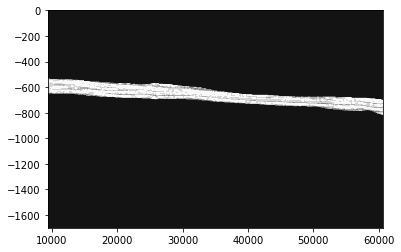

In [54]:
dims=seis_clean.shape
y_pix=np.linspace(8400,59600,dims[1])
z_pix=np.linspace(0,z_mod,dims[0])
yloc=np.zeros((dims[0],dims[1]))
zloc=np.zeros((dims[0],dims[1]))


for j in range(0,dims[1]): #trim to line 529 only
    zloc[:,j]=0-z_pix
for k in range(0,dims[0]):  
    yloc[k,:]=69000-y_pix
plt.contourf(yloc,zloc,seis_int,cmap='gray',vmin=0,vmax=1)
plt.show()
# # dipline
#xx=40800*np.ones((dims[0]*dims[1]))
# # strikeline
yy=60500*np.ones((dims[0]*dims[1]))
# # dip line
#data_out=np.stack((xx,np.flipud(yloc.flatten()),zloc.flatten(),seis_int.flatten()),axis=1)
#strike line
data_out=np.stack((yloc.flatten(),yy,zloc.flatten(),seis_int.flatten()),axis=1)

np.savetxt('Temp\%s_xyz_strike.txt'% filename,
           data_out,delimiter=',',
           fmt='%10.3f')

# Clean-up & random selection

In [55]:
data_in=open('Temp\%s_xyz_strike.txt'% filename,'r').readlines()

# clean up
with open('Temp\%s_xyz_clean_strike.txt' % filename, 'w') as outfile:
    for line in data_in:
        check=line.strip().split(',')[3]
        check2=line.strip().split(',')[2]
        if check!='     0.000' and check2!='     0.000':
            outfile.write(line)
outfile.close()
#Random sampling

data_clean=open('Temp\%s_xyz_clean_strike.txt'% filename,'r').readlines()
full=len(data_clean)
samp_size=int(0.10*full)
data_ran_samp=random.sample(data_clean,samp_size)
with open('Data\Attr_strike\%s_xyz_strike_clean_ran.txt' % filename, 'w') as outfile:
    outfile.write('#X,Y,Z,attr \n')
    for line in data_ran_samp:
        outfile.write(line)
outfile.close()

#  View data

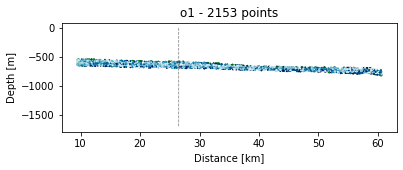

In [56]:
#filename='m58_attr_sm_str'
data = np.genfromtxt('Data\Attr_strike\%s_xyz_strike_clean_ran.txt' % filename, delimiter=',')
num=data.shape[0]
xc=26.5*np.ones([1700,1])
zc=np.linspace(0,-1700,1700)
#Plotting Figure
fig2,ax=plt.subplots(figsize=(6,2))
pts=plt.scatter(data[0::,0]/1000,data[0::,2],c=data[0::,3],s=1,cmap='ocean')
plt.plot(xc,zc,'--',linewidth=0.75,color='gray') # intersection of line 529

#ax.set_xlim(0,69)
#ax.set_ylim(-1400,-300)

plt.title('o1 - {} points'.format(num))
plt.xlabel('Distance [km]')
plt.ylabel('Depth [m]')
#cbar=fig2.colorbar(pts,orientation="horizontal", pad=0.2)
#cbar.ax.set_xlabel('Normalized amplitude', rotation=0)
plt.show()
fig2.savefig('Figures\Strikeline_%s.jpg'%filename,dpi=450,bbox_inches='tight')

